# Retail Sales Forecasting (Time Series, ARIMA)

**Given Brief**

A retail company would like a sales forecast for Q3. 

Started on December 25, 2019.


**Quarters**

* Q1 - January, February, March
* Q2 - April, May, June
* Q3 - July, August, September
* Q4 - October, November, December

In [1]:
# Started on December 24, 2019
# By David
# Time Series Retail Sales Forecasting 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

from pmdarima import auto_arima 
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# Reading in the retail data:

retail_data = pd.read_csv('retail_data.csv')

In [3]:
# Check head:

retail_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2016-124891,2016-07-31,2016-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2017-77878,2017-02-05,2017-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2017-71249,2017-10-17,2017-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2017-1579342,2017-01-28,2017-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2017-4320,2017-11-05,2017-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [4]:
# Columns:

retail_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [5]:
# Info:

retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row ID            51290 non-null int64
Order ID          51290 non-null object
Order Date        51290 non-null object
Ship Date         51290 non-null object
Ship Mode         51290 non-null object
Customer ID       51290 non-null object
Customer Name     51290 non-null object
Segment           51290 non-null object
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Postal Code       9994 non-null float64
Market            51290 non-null object
Region            51290 non-null object
Product ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null float64
Shipping C

In [6]:
# Check for any NULLs:

retail_data.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [7]:
# Drop the Postal Code column:

retail_data.drop('Postal Code', axis = 1, inplace = True)

In [8]:
# Check tail:

retail_data.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,29002,IN-2018-62366,2018-06-19,2018-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2018-102288,2018-06-20,2018-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2017-155768,2017-12-02,2017-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2016-140767,2016-02-18,2016-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium
51289,6147,MX-2016-134460,2016-05-22,2016-05-26,Second Class,MC-18100,Mick Crebagga,Consumer,Tipitapa,Managua,...,OFF-PA-10004155,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.380,3,0.0,1.8000,0.00,High


In [9]:
# Convert To Datetime On Order Date & Ship Date:

retail_data['Order Date'] = pd.to_datetime(retail_data['Order Date'])
retail_data['Ship Date'] = pd.to_datetime(retail_data['Ship Date'])

In [10]:
# Check data types.

retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
Row ID            51290 non-null int64
Order ID          51290 non-null object
Order Date        51290 non-null datetime64[ns]
Ship Date         51290 non-null datetime64[ns]
Ship Mode         51290 non-null object
Customer ID       51290 non-null object
Customer Name     51290 non-null object
Segment           51290 non-null object
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Market            51290 non-null object
Region            51290 non-null object
Product ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null float64
Shipping Cost     51290 non-null f

## Overall Monthly Number Of Orders


In [11]:
# Trying groupby on datetimes:
# Obtain counts for each month
# Reference: https://stackoverflow.com/questions/18233107/pandas-convert-datetime-to-end-of-month

retail_data['Order_Date_Month'] = retail_data['Order Date'].astype('datetime64[M]')

In [12]:
# Number of orders per month:

orders_permonth = retail_data.groupby('Order_Date_Month')['Row ID'].count()

orders_permonth.head(12)

Order_Date_Month
2015-01-01     433
2015-02-01     378
2015-03-01     539
2015-04-01     564
2015-05-01     566
2015-06-01     917
2015-07-01     495
2015-08-01     878
2015-09-01    1052
2015-10-01     774
2015-11-01    1139
2015-12-01    1263
Name: Row ID, dtype: int64

Text(0.5, 1.0, 'Number Of Orders Per Month \n')

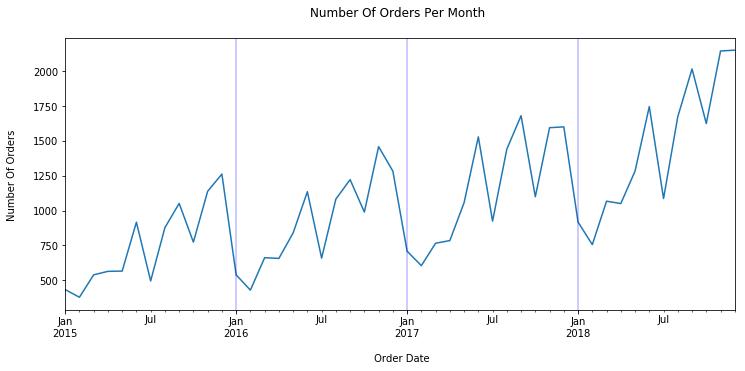

In [13]:
# Number of Monthly Orders

orders_permonth.plot(figsize = (12, 5))
plt.xlabel('\n Order Date')
plt.ylabel('Number Of Orders \n')

# Vertical lines at start of each year
plt.axvline(x = '2016-01-01', linewidth=2, color='blue', alpha = 0.2) 
plt.axvline(x = '2017-01-01', linewidth=2, color='blue', alpha = 0.2)
plt.axvline(x = '2018-01-01', linewidth=2, color='blue', alpha = 0.2)
plt.title('Number Of Orders Per Month \n')

The overall trend is increasing for the number of orders. Peak number of orders occur around November and December during holiday seasons.


## Overall Monthly Sales

In [14]:
# Obtain monthly order sales

sales_monthly = retail_data.groupby('Order_Date_Month')['Sales'].sum()

sales_monthly.head(12)

Order_Date_Month
2015-01-01     98898.48886
2015-02-01     91152.15698
2015-03-01    145729.36736
2015-04-01    116915.76418
2015-05-01    146747.83610
2015-06-01    215207.38022
2015-07-01    115510.41912
2015-08-01    207581.49122
2015-09-01    290214.45534
2015-10-01    199071.26404
2015-11-01    298496.53752
2015-12-01    333925.73460
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Monthly Order Sales\n')

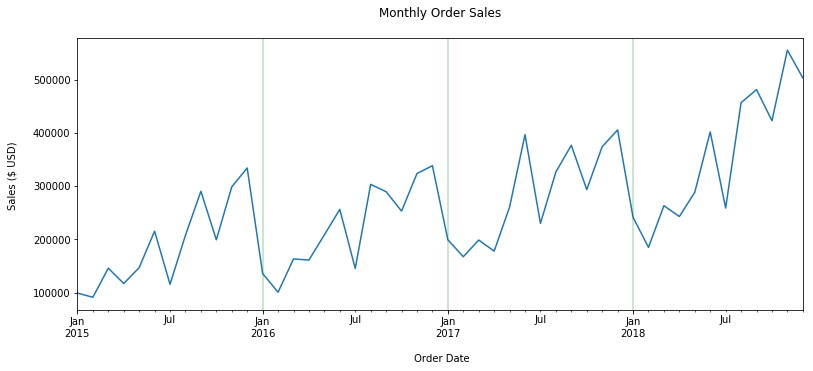

In [15]:
# Monthly Sales Plot

sales_monthly.plot(figsize = (13, 5))
plt.xlabel('\n Order Date')
plt.ylabel('Sales ($ USD) \n')

# Vertical lines at start of each year
plt.axvline(x = '2016-01-01', linewidth=2, color='green', alpha = 0.2) 
plt.axvline(x = '2017-01-01', linewidth=2, color='green', alpha = 0.2)
plt.axvline(x = '2018-01-01', linewidth=2, color='green', alpha = 0.2)

# Title
plt.title('Monthly Order Sales\n')

The overall trend for monthly sales is slightly increasing until the end of 2018 with a big increase. Sales peak in the second half of each year (especially during the holidays).

# Training Set & Test Set

In [16]:
train_sales = sales_monthly.iloc[:len(sales_monthly)-12]
test_sales = sales_monthly.iloc[len(sales_monthly)-12:]

In [17]:
train_sales.tail()

Order_Date_Month
2017-08-01    326488.78936
2017-09-01    376619.24568
2017-10-01    293406.64288
2017-11-01    373989.36010
2017-12-01    405454.37802
Name: Sales, dtype: float64

In [18]:
test_sales

Order_Date_Month
2018-01-01    241268.55566
2018-02-01    184837.35556
2018-03-01    263100.77262
2018-04-01    242771.86130
2018-05-01    288401.04614
2018-06-01    401814.06310
2018-07-01    258705.68048
2018-08-01    456619.94236
2018-09-01    481157.24370
2018-10-01    422766.62916
2018-11-01    555279.02700
2018-12-01    503143.69348
Name: Sales, dtype: float64

# Monthly Sales 2018 - SARIMAX Model

In [19]:
# Obtain recommended SARIMAX model summary on training data:

auto_arima(train_sales, seasonal = True, m = 12).summary()

C:\Users\DKu_7\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 2) seasonal_order=(1, 1, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\DKu_7\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Statespace Model Results                            
================================================================================
Dep. Variable:                        y   No. Observations:                   36
Model:             SARIMAX(1, 1, 0, 12)   Log Likelihood                -281.904
Date:                  Fri, 27 Dec 2019   AIC                            569.809
Time:                          10:50:02   BIC                            573.343
Sample:                               0   HQIC                           570.746
                                   - 36                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.776e+04   9833.905      4.857      0.000    2.85e+04     6.7e+04
ar.S.L12      -0.0639      0.077     -0.827      0.408      -0.215       0.087
sigma2      1.018e+09      0.256   3.98e+09      0.000    1.02e+09    1.02e+09
===================================================================================
Ljung-Box (Q):                       13.51   Jarque-Bera (JB):                 6.29
Prob(Q):                              0.94   Prob(JB):                         0.04
Heteroskedasticity (H):               2.17   Skew:                             1.09
Prob(H) (two-sided):                  0.29   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.27e+25. Standard errors may be unstable.
"""

In [20]:
train_model = SARIMAX(train_sales, seasonal_order=(1,1,0,12))
results = train_model.fit()
results.summary()

C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -292.991
Date:                            Fri, 27 Dec 2019   AIC                            591.982
Time:                                    10:50:02   BIC                            595.516
Sample:                                01-01-2015   HQIC                           592.920
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2475      0.091      2.713      0.007       0.069       0.426
ar.S.L12       0.1092      0.088      1.247      0.212      -0.062       0.281
sigma2      1.783e+09   2.83e-12   6.31e+20      0.000    1.78e+09    1.78e+09
===================================================================================
Ljung-Box (Q):                       25.24   Jarque-Bera (JB):                 0.10
Prob(Q):                              0.34   Prob(JB):                         0.95
Heteroskedasticity (H):               3.03   Skew:                             0.15
Prob(H) (two-sided):                  0.14   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.95e+38. Standard errors may be unstable.
"""

In [21]:
# Obtain predictions:

preds = results.predict(start= len(train_sales), end = len(sales_monthly) - 1 , dynamic=False, typ='levels').rename('SARIMA(1,0,0)(1,1,0,12) Predictions')

C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [22]:
preds

2018-01-01    222629.287260
2018-02-01    178617.881344
2018-03-01    203486.089420
2018-04-01    179903.731527
2018-05-01    266255.769039
2018-06-01    411866.417428
2018-07-01    239184.696388
2018-08-01    329040.077765
2018-09-01    386148.669639
2018-10-01    297827.375140
2018-11-01    379503.578162
2018-12-01    412795.163253
Freq: MS, Name: SARIMA(1,0,0)(1,1,0,12) Predictions, dtype: float64

### Predictions Vs Test Set Values

In [23]:
# Obtain Mean Squared Error and Root Mean Squared Error

mse = mean_squared_error(test_sales, preds)
rmse = np.sqrt(mse)


In [24]:
print(f'MSE For SARIMA(1,0,0)(1,1,0,12) : {mse:.2f}')
print(f'RMSE For For SARIMA(1,0,0)(1,1,0,12): {rmse:.2f}')

MSE For SARIMA(1,0,0)(1,1,0,12) : 7403156820.35
RMSE For For SARIMA(1,0,0)(1,1,0,12): 86041.60


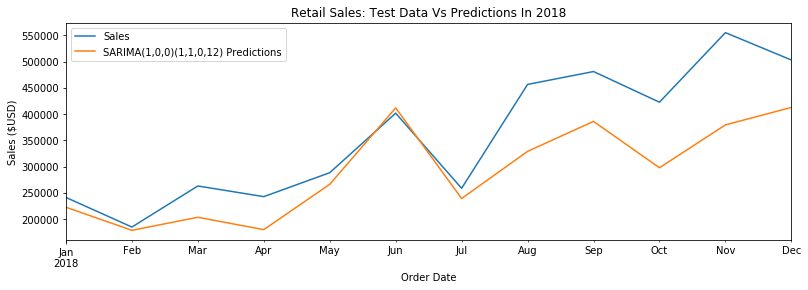

In [25]:
# Plot test data with predictions (2018 year):

ax = test_sales.plot(legend = True,figsize = (13,4), title = 'Retail Sales: Test Data Vs Predictions In 2018')

preds.plot(legend = True)
ax.autoscale(axis = 'x', tight = True)
ax.set(xlabel = 'Order Date', ylabel = 'Sales ($USD)');

The predictions from the SARIMA fitted model are mostly below the actual sales (test data) values for 2018. Predictions do follow the trends closely.

## Fitting SARIMA Model To Entire Monthly Sales Data

In [26]:
# Recommended SARIMA Model to monthly sales:

auto_arima(sales_monthly, seasonal = True, m = 12).summary()

C:\Users\DKu_7\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 2) seasonal_order=(1, 1, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\DKu_7\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(1, 0, 2)x(1, 1, 0, 12)   Log Likelihood                -428.647
Date:                            Fri, 27 Dec 2019   AIC                            869.294
Time:                                    10:50:09   BIC                            878.795
Sample:                                         0   HQIC                           872.610
                                             - 48                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.033e+04   8.26e+04      0.488      0.625   -1.22e+05    2.02e+05
ar.L1          0.4807      1.008      0.477      0.633      -1.495       2.457
ma.L1         -0.2367      1.024     -0.231      0.817      -2.244       1.770
ma.L2         -0.2529      0.244     -1.037      0.300      -0.731       0.225
ar.S.L12      -0.2041      0.146     -1.397      0.162      -0.490       0.082
sigma2      1.674e+09      0.882    1.9e+09      0.000    1.67e+09    1.67e+09
===================================================================================
Ljung-Box (Q):                       28.77   Jarque-Bera (JB):                 7.44
Prob(Q):                              0.76   Prob(JB):                         0.02
Heteroskedasticity (H):               2.64   Skew:                             1.06
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.07e+25. Standard errors may be unstable.
"""

* On the training data, the suggested SARIMA model was SARIMAX(1, 0, 0)x(1, 1, 0, 12).
* On the entire data, the suggested SARIMA model is SARIMAX(1, 0, 2)x(1, 1, 0, 12). There is a model selection difference. 	

In [69]:
mth_sales_model = SARIMAX(sales_monthly, order = (1, 0, 2), seasonal_order=(1,1,0,12),
                          enforce_stationarity = False)

results_sales = mth_sales_model.fit()
results_sales.summary()

C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 0, 2)x(1, 1, 0, 12)   Log Likelihood                -273.261
Date:                            Fri, 27 Dec 2019   AIC                            556.522
Time:                                    11:01:16   BIC                            562.199
Sample:                                01-01-2015   HQIC                           557.950
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0086      0.024     41.972      0.000       0.962       1.056
ma.L1         -0.4162      0.316     -1.319      0.187      -1.035       0.202
ma.L2         -0.5838      0.308     -1.893      0.058      -1.188       0.021
ar.S.L12      -0.4862      0.501     -0.970      0.332      -1.469       0.496
sigma2      1.827e+09   7.81e-11   2.34e+19      0.000    1.83e+09    1.83e+09
===================================================================================
Ljung-Box (Q):                       16.42   Jarque-Bera (JB):                 4.83
Prob(Q):                              0.79   Prob(JB):                         0.09
Heteroskedasticity (H):               1.61   Skew:                             1.11
Prob(H) (two-sided):                  0.51   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.11e+35. Standard errors may be unstable.
"""

In [70]:
# Obtain predictions:

preds_2019 = results_sales.predict(start= len(sales_monthly), end = len(sales_monthly) + 11 , dynamic=False, typ='levels').rename('SARIMA(1,0,2)(1,1,0,12) Predictions')

C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [71]:
preds_2019

2019-01-01    313265.477372
2019-02-01    281148.733155
2019-03-01    337507.332401
2019-04-01    317872.805652
2019-05-01    382432.783908
2019-06-01    507763.737445
2019-07-01    354172.111908
2019-08-01    503749.662298
2019-09-01    541680.378940
2019-10-01    472179.468839
2019-11-01    580410.033142
2019-12-01    569895.999688
Freq: MS, Name: SARIMA(1,0,2)(1,1,0,12) Predictions, dtype: float64

In [72]:
# Append first prediction value to make plot look smooth / connected.

sales_monthly.append(preds_2019.head(1)).rename('Sales').tail()

2018-09-01    481157.243700
2018-10-01    422766.629160
2018-11-01    555279.027000
2018-12-01    503143.693480
2019-01-01    313265.477372
Name: Sales, dtype: float64

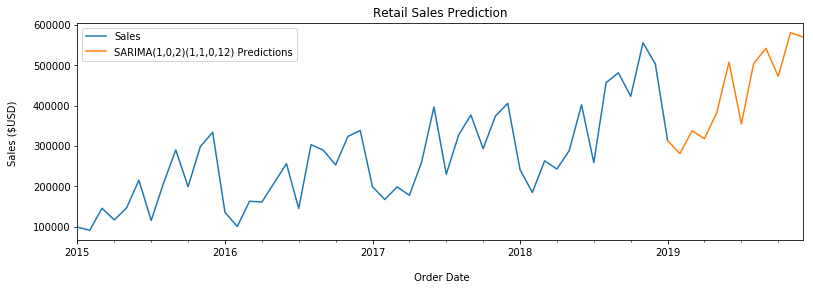

In [73]:
# Monthly Sales With 2019 Predictions (Q3 Included)

ax = sales_monthly.append(preds_2019.head(1)).rename('Sales').plot(legend = True,
                                                                   figsize = (13,4), 
                                                                   title = 'Retail Sales Prediction')

preds_2019.plot(legend = True)
ax.autoscale(axis = 'x', tight = True)
ax.set(xlabel = '\n Order Date', ylabel = 'Sales ($USD) \n');

# Sales Forecasting By Category

The retail store offers three categories of items. These are:

* Office Supplies
* Furniture
* Technology

In the original notebook (3 part), I did forecasting on profits. This time around, I am doing just sales forecasting.

## Pie Chart For Categories

In [74]:
category_order_counts = retail_data.groupby('Category')['Order Date'].count().sort_values(ascending = False)

category_order_counts

Category
Office Supplies    31273
Technology         10141
Furniture           9876
Name: Order Date, dtype: int64

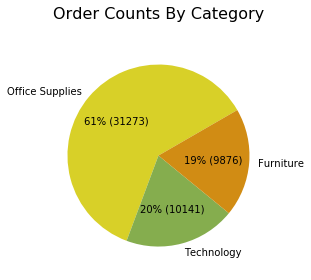

In [75]:
# Pretty much same code chunk as in original notebook.
# Run a pie chart for Categories:
# Reference: https://www.youtube.com/watch?v=MPiz50TsyF0
# Reference: https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct

pie_labels = ['Office Supplies', 'Technology', 'Furniture']

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val=int((pct*total/100.0) + 0.5)
        return '{p:.0f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(category_order_counts, labels = pie_labels, 
        autopct = make_autopct(category_order_counts),
        startangle = 30,
        colors = ['#D8D028', '#85AD4E', '#D18C14'])

plt.title('Order Counts By Category\n', size = 16)

plt.tight_layout()
# plt.savefig('pie_catgCounts.png', dpi = 300)
plt.show()


## Office Supplies Monthly Sales

In [76]:
# Retail data with office supplies only:

office_data = retail_data[retail_data['Category'] == 'Office Supplies']

office_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Date_Month
8,40155,CA-2018-135909,2018-10-14,2018-10-21,Standard Class,JW-15220,Jane Waco,Corporate,Sacramento,California,...,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.960,5,0.2,1906.485,867.69,Low,2018-10-01
10,34577,CA-2015-102988,2015-04-05,2015-04-09,Second Class,GM-14695,Greg Maxwell,Corporate,Alexandria,Virginia,...,Office Supplies,Supplies,Martin Yale Chadless Opener Electric Letter Op...,4164.050,5,0.0,83.281,846.54,High,2015-04-01
14,27704,IN-2017-73951,2017-06-06,2017-06-08,Second Class,PF-19120,Peter Fuller,Consumer,Mudanjiang,Heilongjiang,...,Office Supplies,Appliances,"KitchenAid Microwave, White",3701.520,12,0.0,1036.080,804.54,Critical,2017-06-01
15,13779,ES-2018-5099955,2018-07-31,2018-08-03,Second Class,BP-11185,Ben Peterman,Corporate,Paris,Ile-de-France,...,Office Supplies,Appliances,"Breville Refrigerator, Red",1869.588,4,0.1,186.948,801.66,Critical,2018-07-01
17,12069,ES-2018-1651774,2018-09-08,2018-09-14,Standard Class,PJ-18835,Patrick Jones,Corporate,Prato,Tuscany,...,Office Supplies,Appliances,"Hoover Stove, Red",7958.580,14,0.0,3979.080,778.32,Low,2018-09-01


In [77]:
# From retail data with office supplies only, group by month and find 
# total profits for each month.

office_mth_sales = office_data.groupby(['Order_Date_Month'])['Sales'].sum()

office_mth_sales.tail()

Order_Date_Month
2018-08-01    155430.7692
2018-09-01    134386.5280
2018-10-01    115770.9289
2018-11-01    163851.3215
2018-12-01    150220.1896
Name: Sales, dtype: float64

In [78]:
# Recommended SARIMA Model to monthly sales on office supplies.

auto_arima(office_mth_sales, seasonal = True, m = 12).summary()

C:\Users\DKu_7\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 1, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\DKu_7\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -391.257
Date:                            Fri, 27 Dec 2019   AIC                            790.514
Time:                                    11:01:42   BIC                            796.736
Sample:                                         0   HQIC                           792.662
                                             - 48                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1318.1228   3372.234      0.391      0.696   -5291.334    7927.580
ar.L1         -0.3713      0.124     -2.983      0.003      -0.615      -0.127
ar.S.L12      -0.4254      0.104     -4.106      0.000      -0.628      -0.222
sigma2      3.372e+08      0.002   1.41e+11      0.000    3.37e+08    3.37e+08
===================================================================================
Ljung-Box (Q):                       57.03   Jarque-Bera (JB):                 0.21
Prob(Q):                              0.01   Prob(JB):                         0.90
Heteroskedasticity (H):               0.47   Skew:                             0.19
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.89e+28. Standard errors may be unstable.
"""

In [37]:
office_sales_model = SARIMAX(office_mth_sales, order=(1,1,0), seasonal_order = (1, 1, 0, 12))

results_office_sales = office_sales_model.fit()
results_office_sales.summary()

C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -391.153
Date:                            Fri, 27 Dec 2019   AIC                            788.306
Time:                                    10:50:13   BIC                            792.973
Sample:                                01-01-2015   HQIC                           789.917
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3735      0.128     -2.924      0.003      -0.624      -0.123
ar.S.L12      -0.4257      0.107     -3.987      0.000      -0.635      -0.216
sigma2      3.389e+08   2.57e-11   1.32e+19      0.000    3.39e+08    3.39e+08
===================================================================================
Ljung-Box (Q):                       57.00   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.01   Prob(JB):                         0.90
Heteroskedasticity (H):               0.48   Skew:                             0.19
Prob(H) (two-sided):                  0.22   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.2e+35. Standard errors may be unstable.
"""

In [38]:
# 2019 Predictions on office supplies sales

office_preds = results_office_sales.predict(start= len(office_mth_sales), 
                                            end = len(office_mth_sales) + 11 , 
                                            dynamic=False, typ='levels').rename('Office Sales 2019 Predictions')

C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [39]:
office_preds.tail()

2019-08-01    167251.582155
2019-09-01    162669.800221
2019-10-01    137772.828351
2019-11-01    179580.512181
2019-12-01    179068.893502
Freq: MS, Name: Office Sales 2019 Predictions, dtype: float64

In [40]:
office_mth_sales.tail()

Order_Date_Month
2018-08-01    155430.7692
2018-09-01    134386.5280
2018-10-01    115770.9289
2018-11-01    163851.3215
2018-12-01    150220.1896
Name: Sales, dtype: float64

In [41]:
# Append first prediction value to office sales make plot look smooth / connected.

office_mth_sales.append(office_preds.head(1)).rename('Sales').tail()

2018-09-01    134386.528000
2018-10-01    115770.928900
2018-11-01    163851.321500
2018-12-01    150220.189600
2019-01-01    112725.043036
Name: Sales, dtype: float64

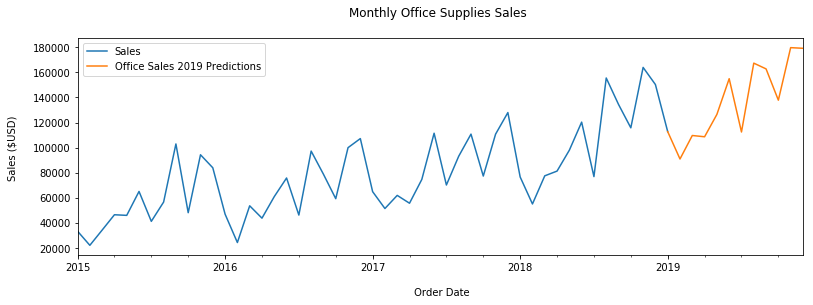

In [42]:
# Plot Monthly office sales vs predicted model.

# Plot test data with predictions (2018 year):

ax = office_mth_sales.append(office_preds.head(1)).rename('Sales').plot(legend = True,
                                                                   figsize = (13,4), 
                                                                   title = 'Monthly Office Supplies Sales \n')

office_preds.plot(legend = True)
ax.autoscale(axis = 'x', tight = True)
ax.set(xlabel = '\n Order Date', ylabel = 'Sales ($USD) \n');

It appears that from the historical sales and the predictions, the overall trend is still upwards for the monthly sales on office supplies. The second half of 2019 is expected to do better than the first 2019 half.

## Furniture Monthly Sales

In [43]:
# Furniture retail data:

furn_data = retail_data[retail_data['Category'] == 'Furniture']

furn_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Date_Month
1,26341,IN-2017-77878,2017-02-05,2017-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2017-02-01
6,30570,IN-2015-81826,2015-11-07,2015-11-09,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.080,4,0.0,564.8400,894.77,Critical,2015-11-01
7,31192,IN-2016-86369,2016-04-14,2016-04-18,Standard Class,MB-18085,Mick Brown,Consumer,Hamilton,Waikato,...,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.840,6,0.0,996.4800,878.38,High,2016-04-01
9,40936,CA-2016-116638,2016-01-28,2016-01-31,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical,2016-01-01
11,28879,ID-2016-28402,2016-04-19,2016-04-22,First Class,AJ-10780,Anthony Jacobs,Corporate,Kabul,Kabul,...,Furniture,Tables,"Bevis Conference Table, Fully Assembled",4626.150,5,0.0,647.5500,835.57,High,2016-04-01


In [44]:
# Group by month for furniture sales.

furn_sales = furn_data.groupby(['Order_Date_Month'])['Sales'].sum()

furn_sales.tail()

Order_Date_Month
2018-08-01    126283.8429
2018-09-01    175776.6427
2018-10-01    130701.1759
2018-11-01    168848.6682
2018-12-01    171826.7786
Name: Sales, dtype: float64

In [45]:
# Recommended SARIMA Model to furniture monthly sales.

auto_arima(furn_sales, seasonal = True, m = 12).summary()

C:\Users\DKu_7\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 2) seasonal_order=(1, 1, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\DKu_7\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(1, 1, 0, 12)   Log Likelihood                -395.580
Date:                            Fri, 27 Dec 2019   AIC                            801.160
Time:                                    10:50:20   BIC                            809.078
Sample:                                         0   HQIC                           803.923
                                             - 48                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.423e+04   1.42e+06      0.010      0.992   -2.77e+06     2.8e+06
ar.L1          0.4679     53.215      0.009      0.993    -103.832     104.768
ma.L1         -0.4703     53.075     -0.009      0.993    -104.495     103.555
ar.S.L12      -0.3046      0.108     -2.814      0.005      -0.517      -0.092
sigma2      2.968e+08   2692.154    1.1e+05      0.000    2.97e+08    2.97e+08
===================================================================================
Ljung-Box (Q):                       31.81   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.62   Prob(JB):                         0.83
Heteroskedasticity (H):               1.98   Skew:                             0.21
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.83e+21. Standard errors may be unstable.
"""

In [46]:
# Using suggested SARIMAX model for furniture monthly sales.
# Need enforce_stationarity to False as there we have an ARMA(1, 1) model not ARIMA. (d = 0, no differencing)

furn_sales_model = SARIMAX(furn_sales, order = (1, 0, 1), seasonal_order = (1, 1, 0, 12),
                           enforce_stationarity = False)

results_furn_sales = furn_sales_model.fit()
results_furn_sales.summary()

C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(1, 1, 0, 12)   Log Likelihood                -254.265
Date:                            Fri, 27 Dec 2019   AIC                            516.530
Time:                                    10:50:20   BIC                            521.072
Sample:                                01-01-2015   HQIC                           517.673
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9989      0.025     40.013      0.000       0.950       1.048
ma.L1         -1.0000      0.104     -9.614      0.000      -1.204      -0.796
ar.S.L12      -0.4525      0.353     -1.282      0.200      -1.144       0.239
sigma2      3.394e+08   9.98e-11    3.4e+18      0.000    3.39e+08    3.39e+08
===================================================================================
Ljung-Box (Q):                       34.41   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.04   Prob(JB):                         0.70
Heteroskedasticity (H):               2.97   Skew:                             0.41
Prob(H) (two-sided):                  0.15   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.91e+34. Standard errors may be unstable.
"""

In [47]:
# 2019 Predictions on furniture sales:

furn_preds = results_furn_sales.predict(start= len(furn_sales), 
                                        end = len(furn_sales) + 11 , 
                                          dynamic=False, typ='levels').rename('Furniture Sales 2019 Predictions')

C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [48]:
furn_preds

2019-01-01    103758.098567
2019-02-01     86838.668854
2019-03-01    107137.544509
2019-04-01     91775.055626
2019-05-01    115910.641375
2019-06-01    155072.799206
2019-07-01    105955.868997
2019-08-01    148268.961048
2019-09-01    182302.529455
2019-10-01    140224.884257
2019-11-01    176231.586679
2019-12-01    187062.170132
Freq: MS, Name: Furniture Sales 2019 Predictions, dtype: float64

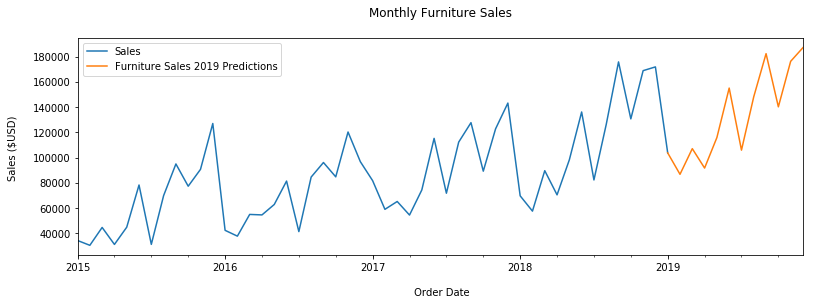

In [49]:
# Plot test data with predictions (2019 year):

ax = furn_sales.append(furn_preds.head(1)).rename('Sales').plot(legend = True,
                                                                   figsize = (13,4), 
                                                                   title = 'Monthly Furniture Sales\n')

furn_preds.plot(legend = True)
ax.autoscale(axis = 'x', tight = True)
ax.set(xlabel = '\n Order Date', ylabel = 'Sales ($USD) \n');

Furniture sales in 2019 is expected to start at a stable range between 80000 and 100000. The second half of the 2019 year will have greater sales overall with greater variability.

## Technology Monthly Sales

In [50]:
# Retail data for technology:

tech_data = retail_data[retail_data['Category'] == 'Technology']

tech_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Date_Month
0,32298,CA-2016-124891,2016-07-31,2016-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2016-07-01
2,25330,IN-2017-71249,2017-10-17,2017-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2017-10-01
3,13524,ES-2017-1579342,2017-01-28,2017-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2017-01-01
4,47221,SG-2017-4320,2017-11-05,2017-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2017-11-01
5,22732,IN-2017-42360,2017-06-28,2017-07-01,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,...,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.2750,897.35,Critical,2017-06-01


In [51]:
# Group by month for technology and take sales

tech_sales = tech_data.groupby(['Order_Date_Month'])['Sales'].sum()

tech_sales.tail()

Order_Date_Month
2018-08-01    174905.33026
2018-09-01    170994.07300
2018-10-01    176294.52436
2018-11-01    222579.03730
2018-12-01    181096.72528
Name: Sales, dtype: float64

In [52]:
# Recommended SARIMA Model to monthly sales on technology.

auto_arima(tech_sales, seasonal = True, m = 12).summary()

C:\Users\DKu_7\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]
C:\Users\DKu_7\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:207: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(2, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -548.438
Date:                            Fri, 27 Dec 2019   AIC                           1106.877
Time:                                    10:50:25   BIC                           1116.128
Sample:                                         0   HQIC                          1110.358
                                             - 48                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5506.6502   5964.616      0.923      0.356   -6183.783    1.72e+04
ar.L1         -0.4144      0.167     -2.475      0.013      -0.743      -0.086
ar.L2         -0.2122      0.219     -0.969      0.332      -0.641       0.217
ar.S.L12       0.4660      0.194      2.399      0.016       0.085       0.847
sigma2      9.954e+08      0.024   4.18e+10      0.000    9.95e+08    9.95e+08
===================================================================================
Ljung-Box (Q):                       29.02   Jarque-Bera (JB):                 2.18
Prob(Q):                              0.90   Prob(JB):                         0.34
Heteroskedasticity (H):               0.56   Skew:                            -0.34
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.98e+26. Standard errors may be unstable.
"""

In [53]:
# Fit suggested SARIMAX model for technology monthly sales:

tech_sales_model = SARIMAX(tech_sales, order = (2, 1, 0), seasonal_order = (1, 0, 0, 12))

results_tech_sales = tech_sales_model.fit()
results_tech_sales.summary()

C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(2, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -548.696
Date:                            Fri, 27 Dec 2019   AIC                           1105.391
Time:                                    10:50:26   BIC                           1112.792
Sample:                                01-01-2015   HQIC                          1108.176
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3832      0.181     -2.116      0.034      -0.738      -0.028
ar.L2         -0.1846      0.238     -0.777      0.437      -0.650       0.281
ar.S.L12       0.4989      0.210      2.373      0.018       0.087       0.911
sigma2      1.025e+09   8.74e-11   1.17e+19      0.000    1.02e+09    1.02e+09
===================================================================================
Ljung-Box (Q):                       28.49   Jarque-Bera (JB):                 2.84
Prob(Q):                              0.91   Prob(JB):                         0.24
Heteroskedasticity (H):               0.59   Skew:                            -0.38
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.17e+34. Standard errors may be unstable.
"""

In [54]:
# 2019 Predictions on office supplies sales

tech_preds = results_tech_sales.predict(start= len(tech_sales), 
                                        end = len(tech_sales) + 11 , 
                                        dynamic=False, typ='levels').rename('Technology Sales 2019 Predictions')


C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [55]:
tech_preds

2019-01-01    168833.950250
2019-02-01    161665.738284
2019-03-01    170574.443286
2019-04-01    168461.834542
2019-05-01    169505.858076
2019-06-01    195839.026868
2019-07-01    172920.113173
2019-08-01    210631.369082
2019-09-01    208663.725583
2019-10-01    211307.352842
2019-11-01    234401.318402
2019-12-01    213705.257164
Freq: MS, Name: Technology Sales 2019 Predictions, dtype: float64

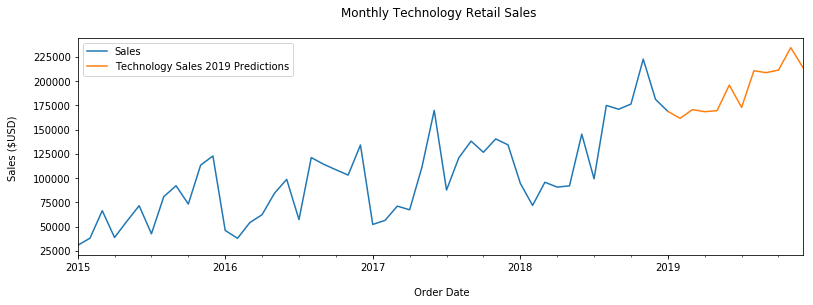

In [56]:
# Plot technology monthly sales with 2019 predictions.

ax = tech_sales.append(tech_preds.head(1)).rename('Sales').plot(legend = True,
                                                                   figsize = (13,4), 
                                                                   title = 'Monthly Technology Retail Sales \n')

tech_preds.plot(legend = True)
ax.autoscale(axis = 'x', tight = True)
ax.set(xlabel = '\n Order Date', ylabel = 'Sales ($USD) \n');

Technology sales in 2019 will stay the same following from the end of 2018 monthly sales. In the second half of 2019, it is projected that technology sales will reach new all time highs.

## Showing All Categories And Their Forecasts

The previous sections showed the monthly order sales plot with their predictions for each category. What if we wanted to compare the sales and predictions for all three categories?


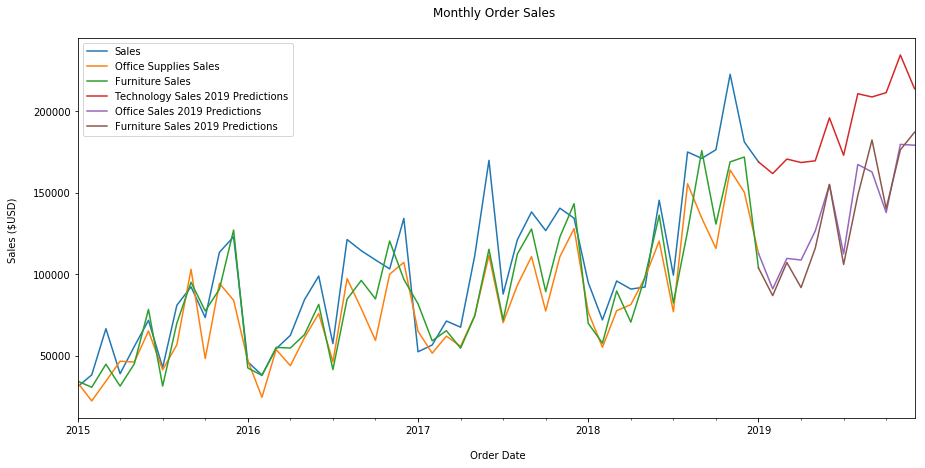

In [57]:
# Plot monthly sales with 2019 predictions with all three categories in one.

ax = tech_sales.append(tech_preds.head(1)).rename('Sales').plot(legend = True,
                                                                   figsize = (15,7), 
                                                                   title = 'Monthly Order Sales \n')

office_mth_sales.append(office_preds.head(1)).rename('Office Supplies Sales').plot(legend = True)
furn_sales.append(furn_preds.head(1)).rename('Furniture Sales').plot(legend = True)
tech_preds.plot(legend = True)
office_preds.plot(legend = True)
furn_preds.plot(legend = True)
ax.autoscale(axis = 'x', tight = True)
ax.set(xlabel = '\n Order Date', ylabel = 'Sales ($USD) \n');

This graph looks messy. Let's try plotting just the sales for all categories in one and have one plot with all the predictions in another one.

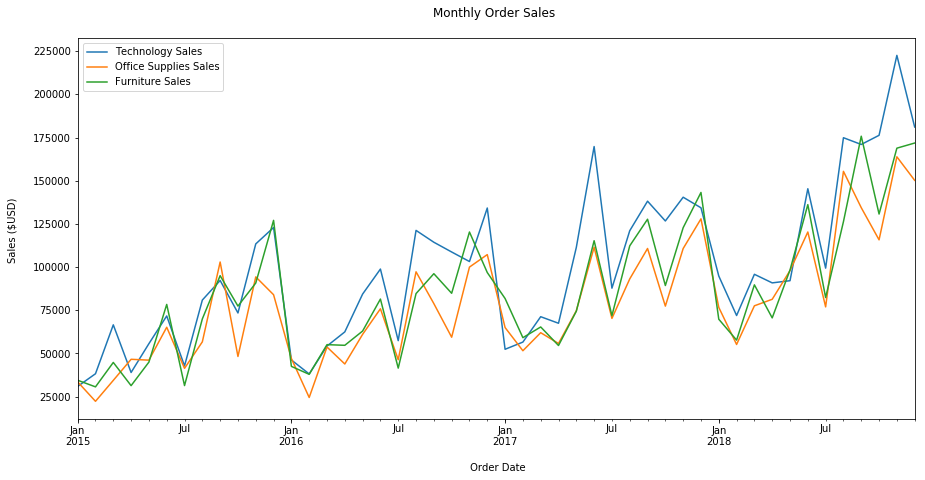

In [58]:
# Plot monthly sales for all three categories in one.

ax = tech_sales.rename('Technology Sales').plot(legend = True,
                                     figsize = (15,7), 
                                     title = 'Monthly Order Sales \n')

office_mth_sales.rename('Office Supplies Sales').plot(legend = True)
furn_sales.rename('Furniture Sales').plot(legend = True)

ax.autoscale(axis = 'x', tight = True)
ax.set(xlabel = '\n Order Date', ylabel = 'Sales ($USD) \n');

It appears that technology sales do better than furniture and office supplies sales for the most part.

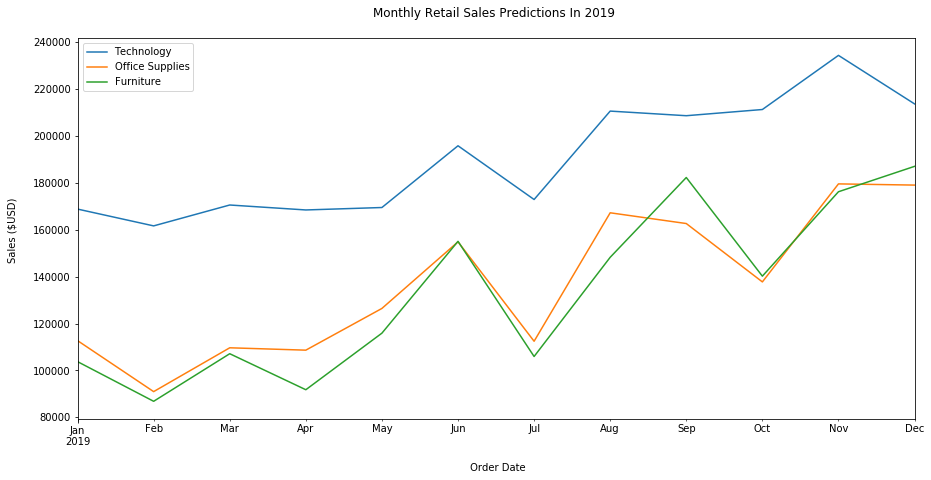

In [59]:
# Plot monthly sales 2019 predictions for all three categories in one.

ax = tech_preds.rename('Technology').plot(legend = True,
                                                     figsize = (15,7), 
                                                     title = 'Monthly Retail Sales Predictions In 2019 \n')

office_preds.rename('Office Supplies').plot(legend = True)
furn_preds.rename('Furniture').plot(legend = True)

ax.autoscale(axis = 'x', tight = True)
ax.set(xlabel = '\n Order Date', ylabel = 'Sales ($USD) \n');

For 2019, it is expected that technology sales will continue to do well over office supplies an furniture sales. Office supplies and furniture sales are expected to increase to the 160000 USD sales figure together.

# Experimentation - Holt-Winters (Exponential Smoothing) Model

In the original three part notebook, the Holt-Winters exponential smoothing model was not used (I did not know about it at the time). 

As an experiment, I want to try it out here and see how the predictions look.

In [61]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [62]:
# Holt Winters Exponential Smoothing Model
# Setting trend and seasonal to additive

HW_model_sales = ExponentialSmoothing(sales_monthly, seasonal_periods = 4 ,
                                    trend = 'add', seasonal = 'add',).fit()

# Obtain predictions for next twelve months:

hw_preds = HW_model_sales.forecast(12)

hw_preds

C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:322: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  start = self.model._index[-1] + 1
C:\Users\DKu_7\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:323: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * s

2019-01-01    517614.395487
2019-02-01    520483.170548
2019-03-01    531926.240795
2019-04-01    580142.044100
2019-05-01    572430.972002
2019-06-01    575299.747062
2019-07-01    586742.817310
2019-08-01    634958.620615
2019-09-01    627247.548517
2019-10-01    630116.323577
2019-11-01    641559.393824
2019-12-01    689775.197129
Freq: MS, dtype: float64

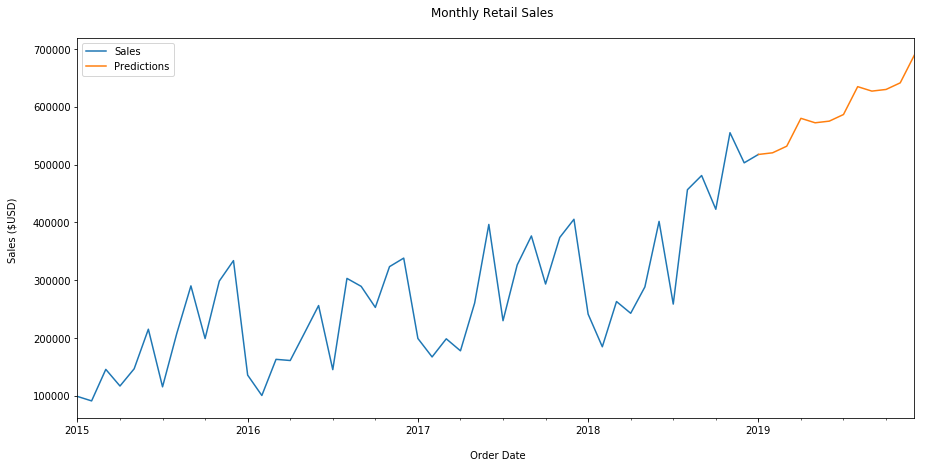

In [67]:
# Plot monthly sales 2019 Holt Winters predictions 

ax = sales_monthly.append(hw_preds.head(1)).rename('Sales').plot(legend = True,
                                                figsize = (15,7), 
                                                title = 'Monthly Retail Sales  \n')

hw_preds.rename('Predictions').plot(legend = True)

ax.autoscale(axis = 'x', tight = True)
ax.set(xlabel = '\n Order Date', ylabel = 'Sales ($USD) \n');

The above plot features the Holt Winters predictions where the monthly retail order sales are increasing. This forecast takes into account the overall trend of the sales.

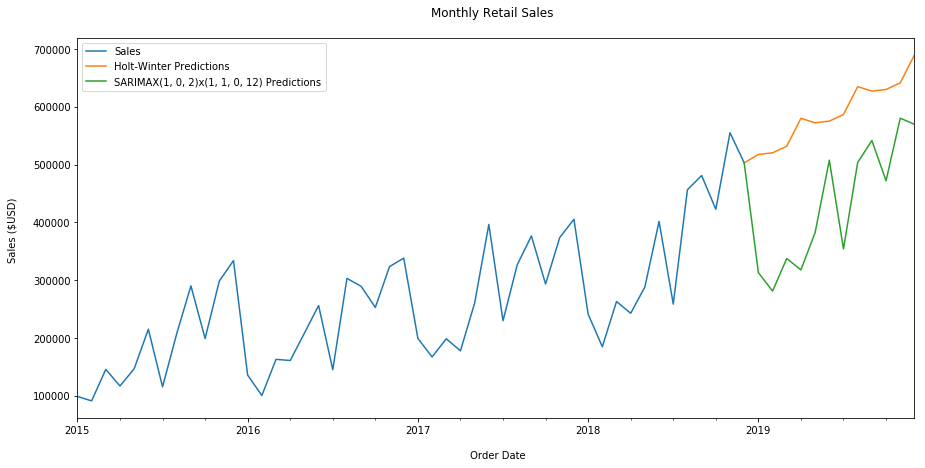

In [87]:
# Plot monthly sales 2019 Holt Winters predictions 

# Historical monthly sales
ax = sales_monthly.rename('Sales').plot(legend = True,
                                                figsize = (15,7), 
                                                title = 'Monthly Retail Sales  \n')

# Two separate predictions:
sales_monthly.tail(1).append(hw_preds).rename('Holt-Winter Predictions').plot(legend = True)
sales_monthly.tail(1).append(preds_2019).rename('SARIMAX(1, 0, 2)x(1, 1, 0, 12) Predictions').plot(legend = True)

ax.autoscale(axis = 'x', tight = True)
ax.set(xlabel = '\n Order Date', ylabel = 'Sales ($USD) \n');

The SARIMAX(1, 0, 2)x(1, 1, 0, 12) forecasting models gives smaller predicted sales in 2019 versus the predictions from the Holt-Winters model.

Model selection is not black and white here. You can argue for either one. I am going with the SARIMAX model here as it fits the seasonal trend within the year and the overall increasing sales trend. The Holt-Winter predictions in orange seem too optimistic and does not really account for seasonality within the 2019 year.